In [33]:
import random
import matplotlib.pyplot as plt

In [34]:
prior = [0.1, 0.2, 0.4, 0.2, 0.1]  # prior distribution over h1, ..., h5
probability = [1, 0.75, 0.5, 0.25, 0]  # probability of cherry of h1, ..., h5
choices = ["C", "L"]  # Cherry and Lime
n_cherry = []

In [35]:
ITER = 10000
collectPosterior = []

# Creating first graph
for iteration in range(ITER):
    whichBag = 0
    # Creating Dataset
    data = random.choices(
        choices, weights=(probability[whichBag], 1 - probability[whichBag]), k=100
    )
    
    posterior = [[item] for item in prior]  # create empty array
    for i in range(100):
        likelihood = []
        # counting number of cherries taken from 0th to i-th unwrap
        n_cherry = 0
        for item in data[: i + 1]:
            if item == "C":
                n_cherry += 1

        for hypoIdx in range(5):
            # calculating likelihood
            if hypoIdx == 0:  # when h1
                if i + 1 == n_cherry:
                    curLikelihood = 1
                else:
                    curLikelihood = 0
            elif hypoIdx == 4:  # when h5
                if n_cherry == 0:
                    curLikelihood = 1
                else:
                    curLikelihood = 0
            else:
                curLikelihood = (probability[hypoIdx] ** n_cherry) * (
                    (1 - probability[hypoIdx]) ** (i + 1 - n_cherry)
                )
            likelihood.append(curLikelihood)

        # calculating normalizing constant by adding all conditional probabilities
        curNormalization = 0
        for hypoIdx in range(5):
            curNormalization += likelihood[hypoIdx] * prior[hypoIdx]

        for hypoIdx in range(5):
            # calculating posterior
            curPosterior = likelihood[hypoIdx] * prior[hypoIdx] / curNormalization
            posterior[hypoIdx].append(curPosterior)
    collectPosterior.append(posterior)
len(collectPosterior[0][0])

101

In [36]:
avgPosterior = [[], [], [], [], []]

for hypoIdx in range(5):
    for i in range(101):
        avg = 0
        for iteration in range(ITER):
            avg += collectPosterior[iteration][hypoIdx][i]
        avg /= ITER
        avgPosterior[hypoIdx].append(avg)

len(avgPosterior[1])

101

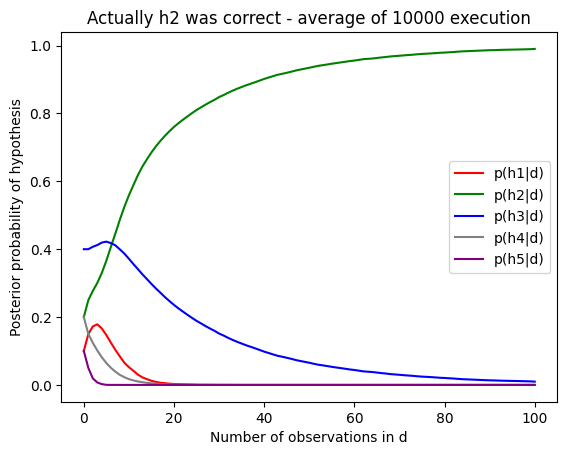

In [37]:
x = [i for i in range(101)]
palette = ['red', 'green', 'blue', 'gray', 'purple']
for i in range(5):
    plt.plot(x, avgPosterior[i], color=palette[i], label="p(h"+str(i+1)+"|d)")
plt.xlabel("Number of observations in d")
plt.ylabel("Posterior probability of hypothesis")
plt.title("Actually h"+str(whichBag+1)+" was correct - average of 10000 execution")
plt.legend()
plt.show()

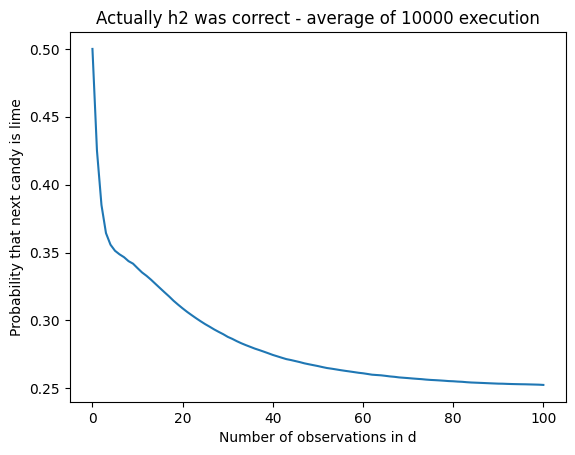

In [38]:
# Creating second graph
prob = []
for i in range(101):
    p = 0
    for hypoIdx in range(5):
        # probability of lime * posterior of each hypothesis
        p += (1 - probability[hypoIdx]) * avgPosterior[hypoIdx][i]
    prob.append(p)

plt.plot(x, prob)
plt.xlabel("Number of observations in d")
plt.ylabel("Probability that next candy is lime")
plt.title("Actually h"+str(whichBag+1)+" was correct - average of 10000 execution")
plt.show()